<a href="https://colab.research.google.com/github/3TInfoTinker/DeepLearningHandsOn/blob/main/Proj_3_RealEstate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%cd drive/MyDrive/DLdataz/DLProject/
%ls

/content/drive/MyDrive/DLdataz/DLProject
 1-ProjectBasics.ipynb
 2-ProjectStats.ipynb
 3-ProjectPlots.ipynb
 BankChurners.gsheet
 BankChurners.xlsx
 DLProjectWork.odt
 Proj-1-ECommerce.docx
 Proj_1_PakistanLargestEcommerceDataset2.csv
 Proj_1_PakistanLargestEcommerceDataset.csv
 Proj-2-HealthCareMainDataset.csv
 Proj2test.csv
 Proj2train.csv
 Proj_3_Real_Estate.csv
 Project2-StrokProject.docx
'Projects Instructions.docx'
 test.png


#**Findings:** *Will be added after learning by doing*

#**Exploring the data**
**Price By:**\
*=Structural Attributes:*
- House age.

*=Locational Attributes:*
- Location i.e. *Lati./Longi.*
- Distance from Metro Rail Transit (MRT).
- No. of convenience stores.

##**After above fact findings, I'll try to do a comparative study between all aspects.**



**Libraries**


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



#**Dataset Loaded**

In [3]:
df = pd.read_csv("Proj_3_Real_Estate.csv")

In [4]:
df.head(2)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area,Unnamed: 8
0,1,2013,32.0,84.87882,10,24.98298,121.54024,37.9,2013
1,2,2013,19.5,306.59470,9,24.98034,121.53951,42.2,2013


#**Let's do something to make the data easy to read**
***Because the column heads are too long.***

In [5]:
renCol = {"X1 transaction date" : "SaleDate", "X2 house age" : "BuildAge",
          "X3 distance to the nearest MRT station" : "NearstMRT",
          "X4 number of convenience stores" : "ConvncStors", 
          "X5 latitude" : "Lati", "X6 longitude" : "Longi", 
          "Y house price of unit area" : "Price"}

df = df.rename(columns = renCol)
df.head()


,No,SaleDate,BuildAge,NearstMRT,ConvncStors,Lati,Longi,Price,Unnamed: 8
0,1,2013,32.0,84.87882,10,24.98298,121.54024,37.9,2013
1,2,2013,19.5,306.59470,9,24.98034,121.53951,42.2,2013
2,3,2014,13.3,561.98450,5,24.98746,121.54391,47.3,2014
3,4,2014,13.3,561.98450,5,24.98746,121.54391,54.8,2014
4,5,2013,5.0,390.56840,5,24.97937,121.54245,43.1,2013


#**Date Look adjusted**

In [6]:
#Disabling to see if it makes any difference

#df['SaleDate'] = df['SaleDate'].astype(int)
#df.head()


In [7]:
df.describe()

,No,SaleDate,BuildAge,NearstMRT,ConvncStors,Lati,Longi,Price,Unnamed: 8
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.169082,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193,2013.169082
std,119.655756,0.375278,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488,0.375278
min,1.000000,2013.000000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000,2013.000000
25%,104.250000,2013.000000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000,2013.000000
50%,207.500000,2013.000000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000,2013.000000
75%,310.750000,2013.000000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000,2013.000000
max,414.000000,2014.000000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000,2014.000000


In [8]:
objcts = df.select_dtypes(include = "object").columns
print (objcts)


Index([], dtype='object')


In [9]:
NulVal = df.isnull().sum()
print(NulVal)

No             0
SaleDate       0
BuildAge       0
NearstMRT      0
ConvncStors    0
Lati           0
Longi          0
Price          0
Unnamed: 8     0
dtype: int64


#**Let's look into dataset for the columns with close relationship**

The relationship between two variables is generally considered *strong* when their r value is *greater than 0.7.* The correlation r measures *the strength of the linear relationship* between two quantitative variables and it *is always a number between -1 and 1.*

In [10]:
correlate = df.corr()
correlate["Price"].sort_values()

NearstMRT     -0.673613
BuildAge      -0.210567
No            -0.028587
SaleDate       0.020810
Unnamed: 8     0.020810
Longi          0.523287
Lati           0.546307
ConvncStors    0.571005
Price          1.000000
Name: Price, dtype: float64

##**Some decoration with Correlation 🙉**

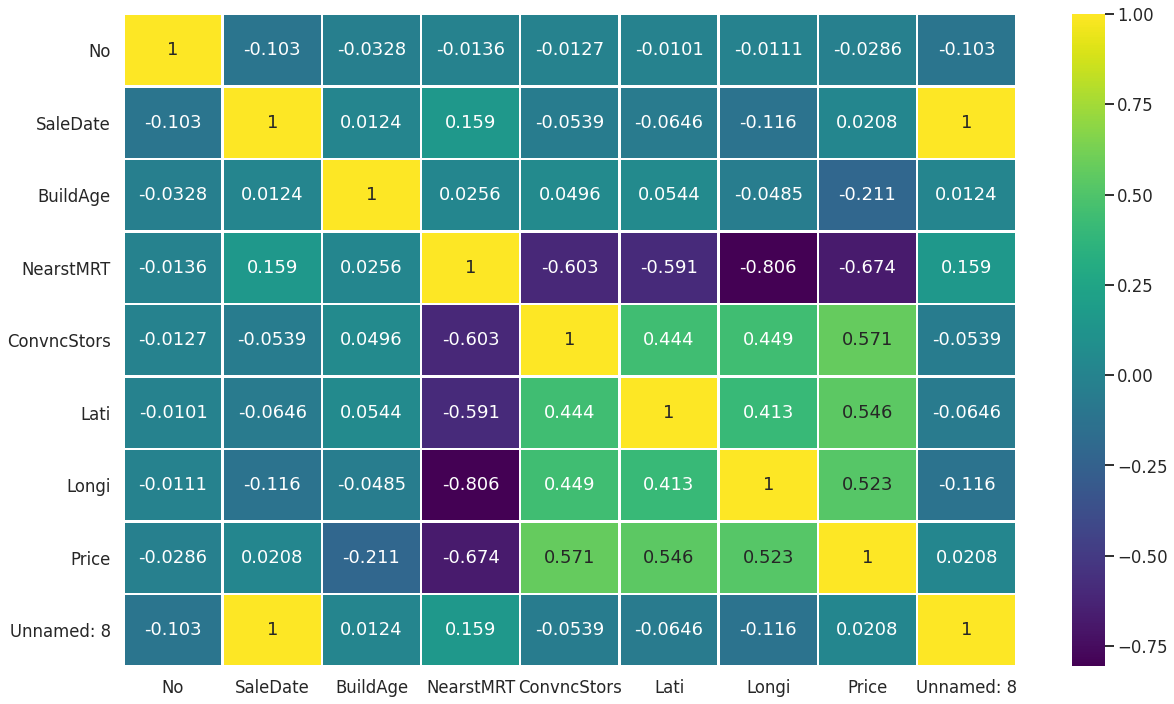

In [20]:
# Added to Libraries Import Section
#import numpy as np
#import seaborn as sns
#import matplotlib.pyplot as plt
#----------------------------------

sns.set(style="darkgrid")
sns.set_context("talk", font_scale = 1)
f, ax = plt.subplots(figsize=(20, 12))
sns.heatmap(correlate, annot=True, fmt= '.3g', cmap='viridis', linewidths = 1.5, cbar_kws = {"shrink" : 1});
#g = sns.set_yticklabels(rotation=90)



##**It looks like Price column is moderately correlatedn with Location's columns and Convenience Stores column.**

**- Longitude : 0.523**\
**- Latitude  : 0.546**\
**- Convenience Stores : 0.571**

#**Knowing about the variable distribution**

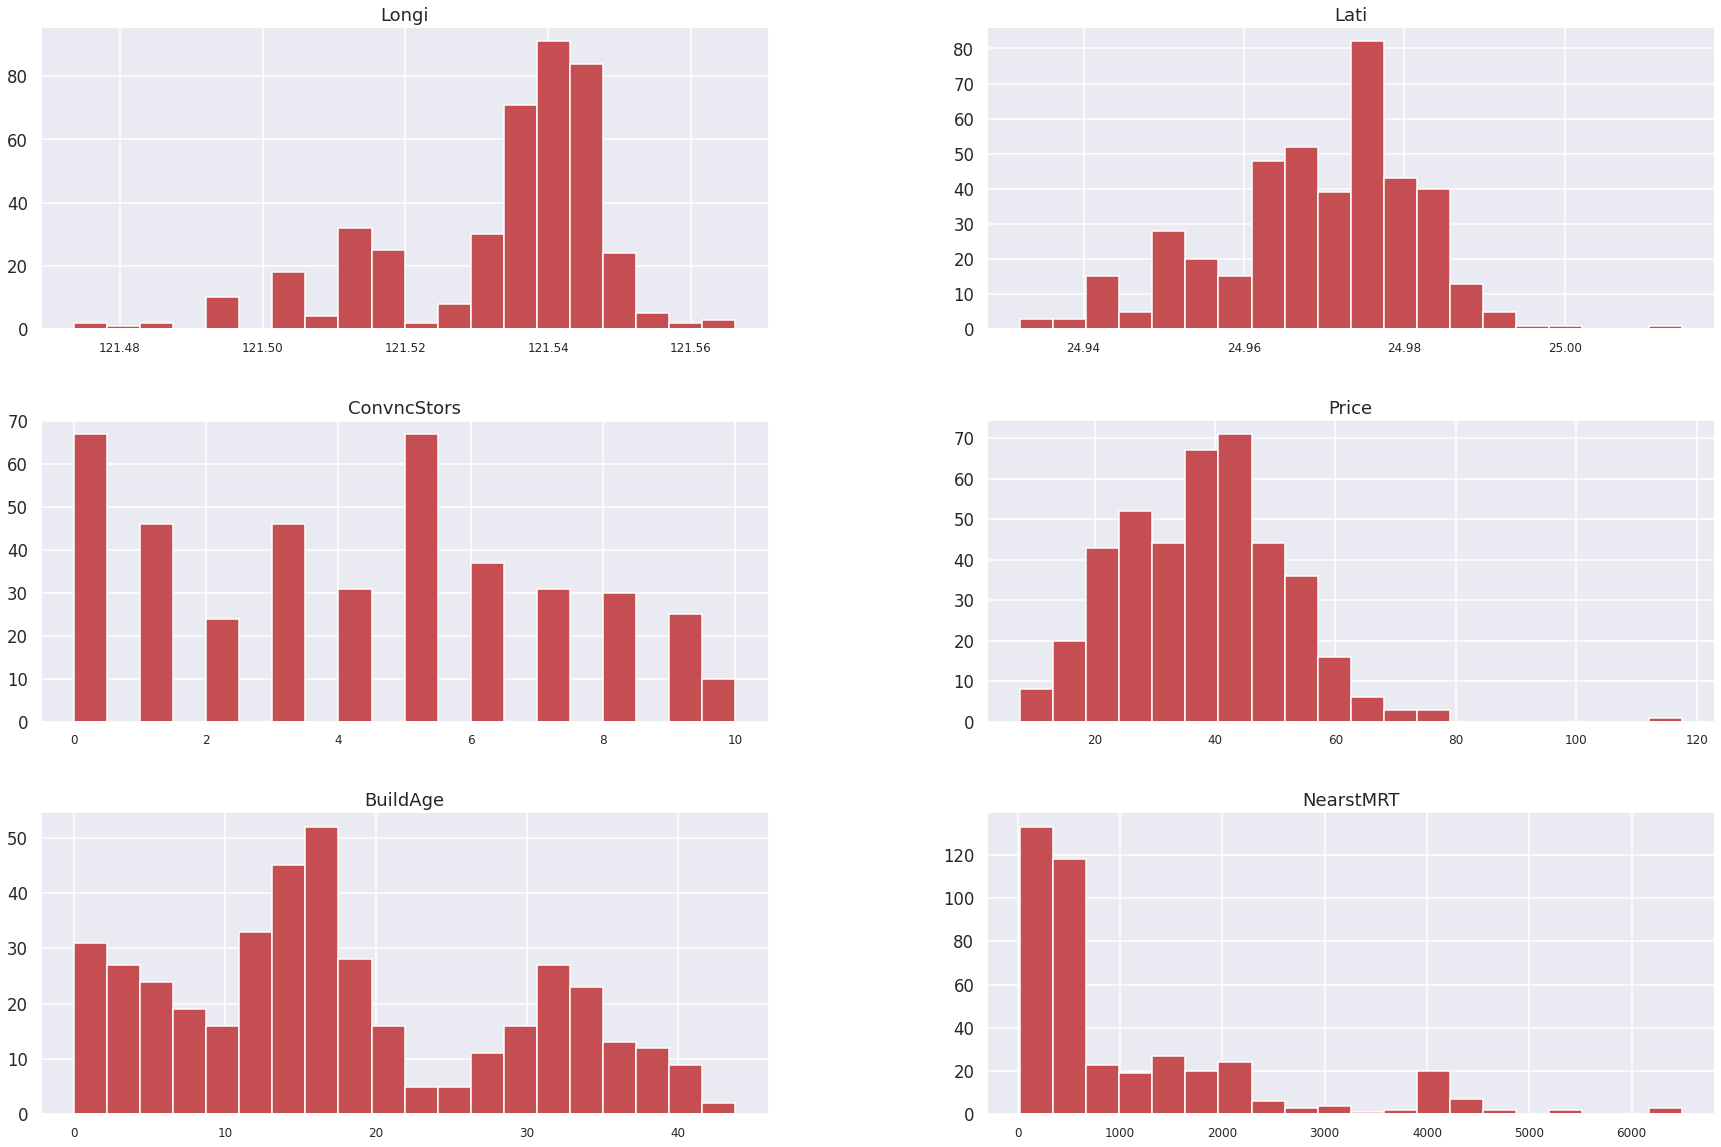

In [32]:

distplt = df[['Longi', 'Lati', 'ConvncStors', 'Price', 'BuildAge', 'NearstMRT']].hist(bins = 20, color = 'r', xlabelsize = 12, figsize = (30, 20), grid = True)

In [ ]:
# IT TOOK MORE THAN 3 Hrs. JUST TO PLOT THE FOLLOWING.-- < I intrrupted the process > 

#sns.catplot(x = "Longi", y = "Lati", hue = "Price", data=df)

#**House Price in relation with Geographical Location. 2012~2014**

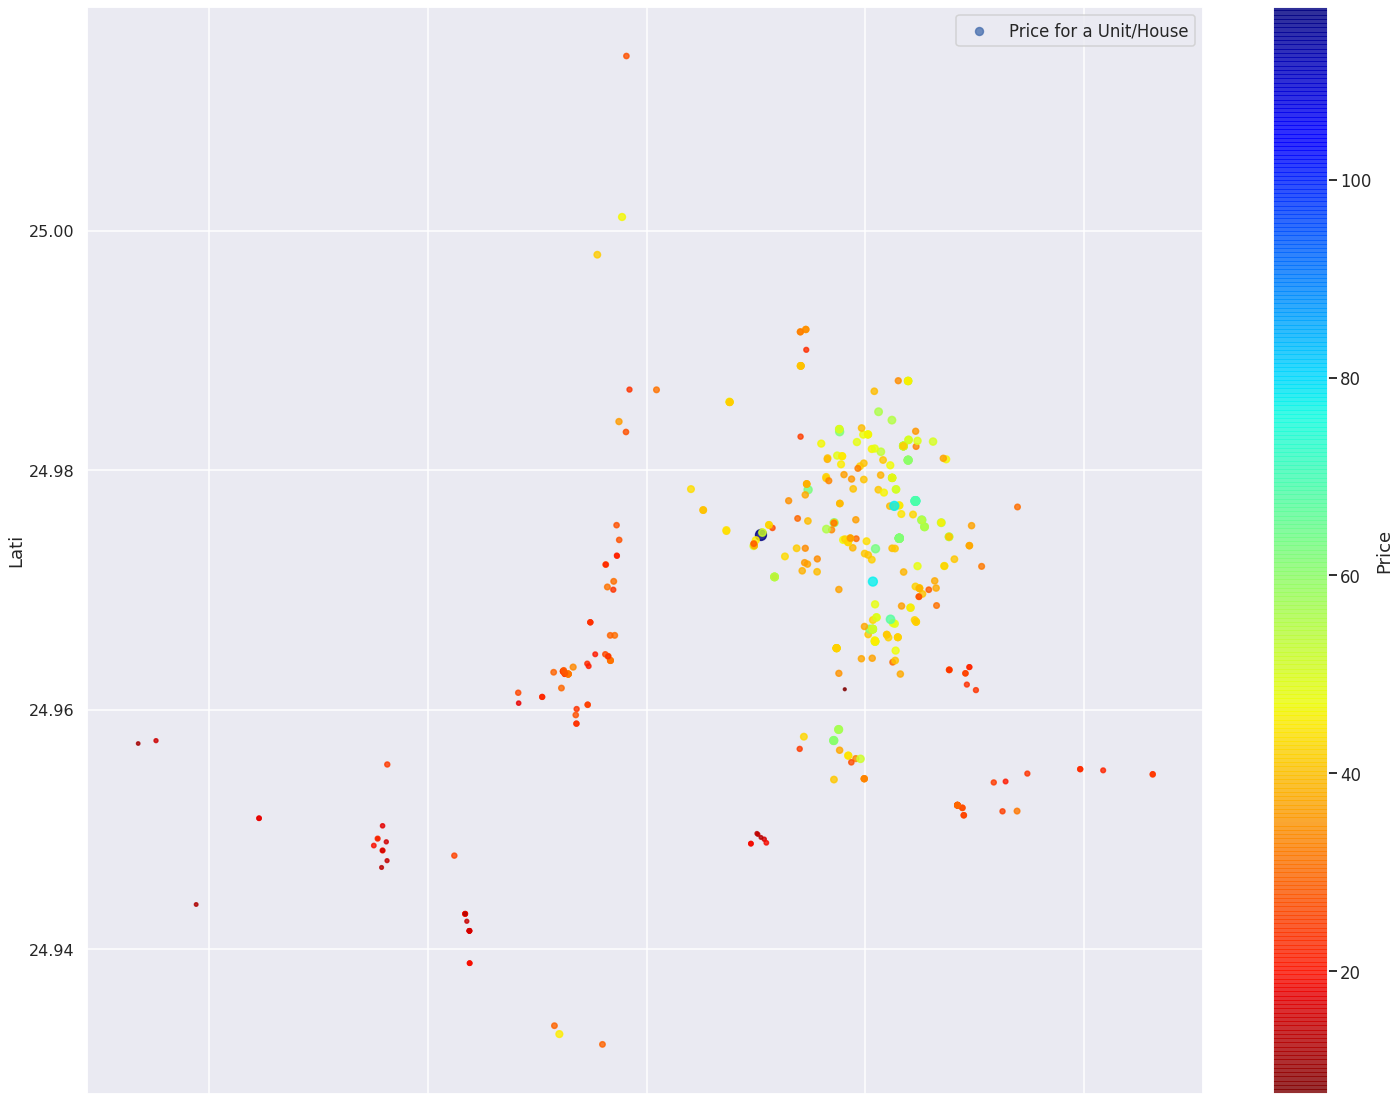

In [24]:
#House Price in relation with Geographic Location. 2012~2014

df.plot(kind = "scatter", x = "Longi", y = "Lati", s = df["Price"], 
        label = "Price for a Unit/House", c = 'Price', cmap = plt.get_cmap("jet_r"), grid = True, colorbar = True, alpha = 0.8, fontsize = 16, figsize = (25,20))
sns.set_context("talk", font_scale = 1)
sns.set(style="darkgrid")
plt.show()


#**🧐 It requires some Real Geological Research artwork to confirm the facts.👇**

##*Somedays 🤫 later*

In [25]:
df[df['No'].isin([36,229,345])]

,No,SaleDate,BuildAge,NearstMRT,ConvncStors,Lati,Longi,Price,Unnamed: 8
35,36,2014,13.9,4079.418,0,25.01459,121.51816,27.3,2014
228,229,2013,11.9,3171.329,0,25.00115,121.51776,46.6,2013
344,345,2014,34.6,3085.170,0,24.99800,121.51550,41.2,2014


#**Learning about the outliers in dataset. 🧗**
**The houses found with high price in dataset may fall in outlier category.**

##**Visualizing distributions of data**

*(**Seaborn documentation**)*\
An early step in any effort to analyze or model data should be to understand how the variables are distributed. 

Techniques for distribution visualization can provide quick answers to many important questions.
- What range do the observations cover?
- What is their central tendency?
- Are they heavily skewed in one direction?
- Is there evidence for bimodality?
- Are there significant outliers?
- Do the answers to these questions vary across subsets defined by other variables?

#**Yearly Transaction/Price by Distance to MRTs**

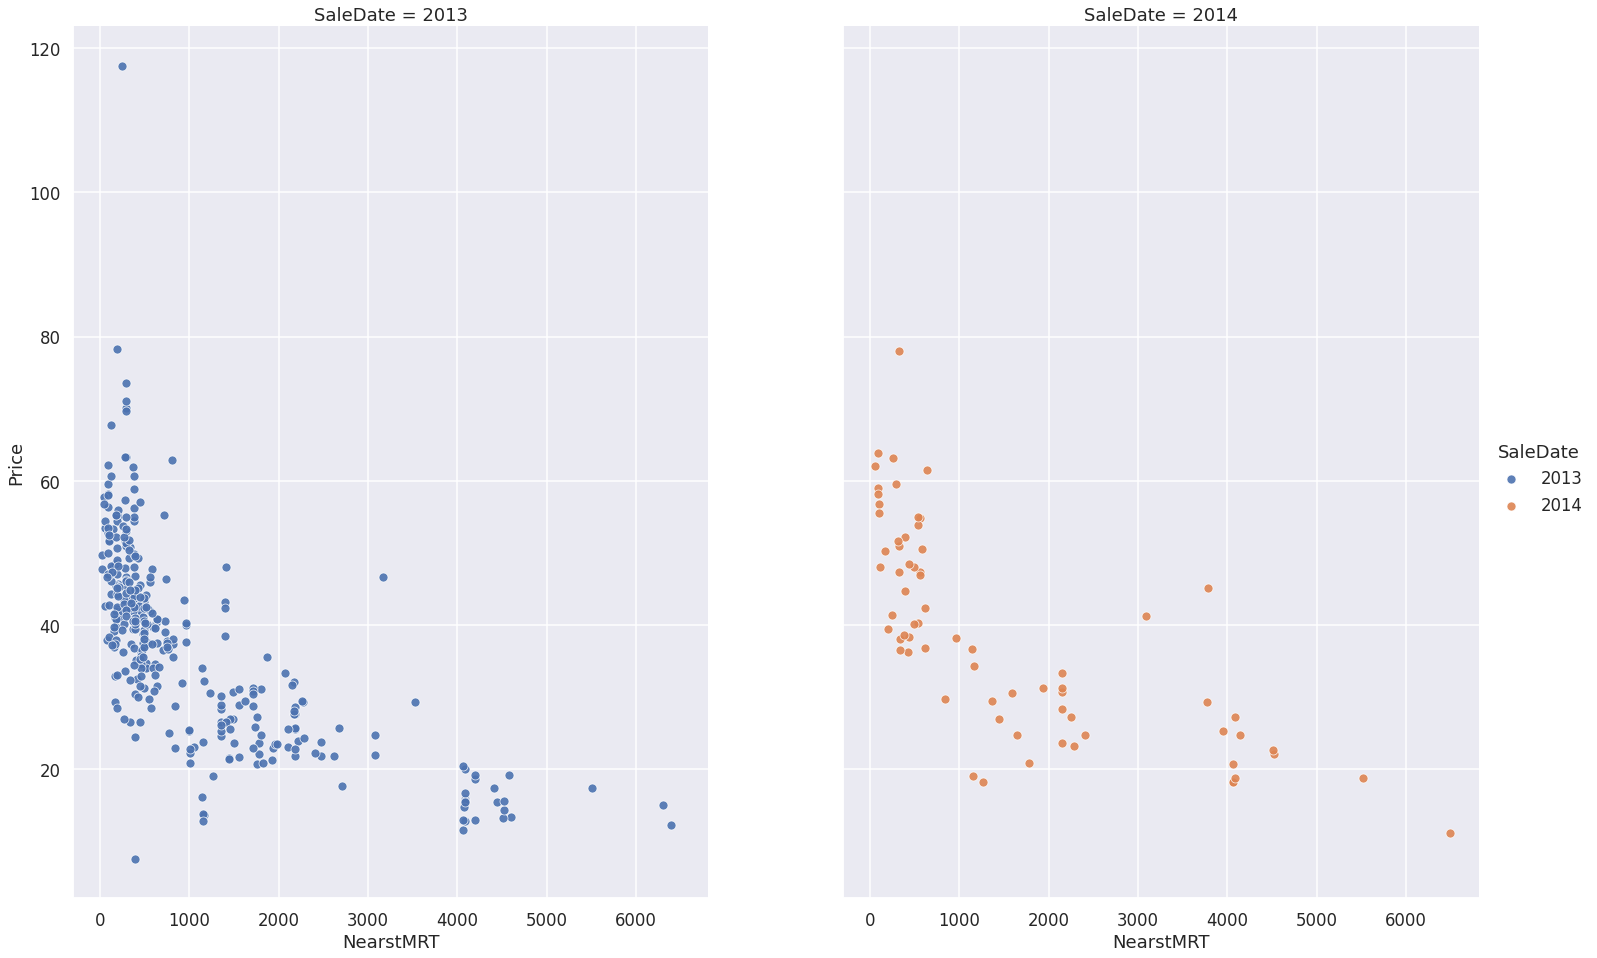

In [26]:
g = sns.set_theme(color_codes=True)
sns.set_context("talk", font_scale = 1)
g = sns.FacetGrid(df,  col="SaleDate", hue = 'SaleDate')
g.map(sns.scatterplot, "NearstMRT", "Price", alpha=.9)
g.fig.set_size_inches(25,25)
g.add_legend();

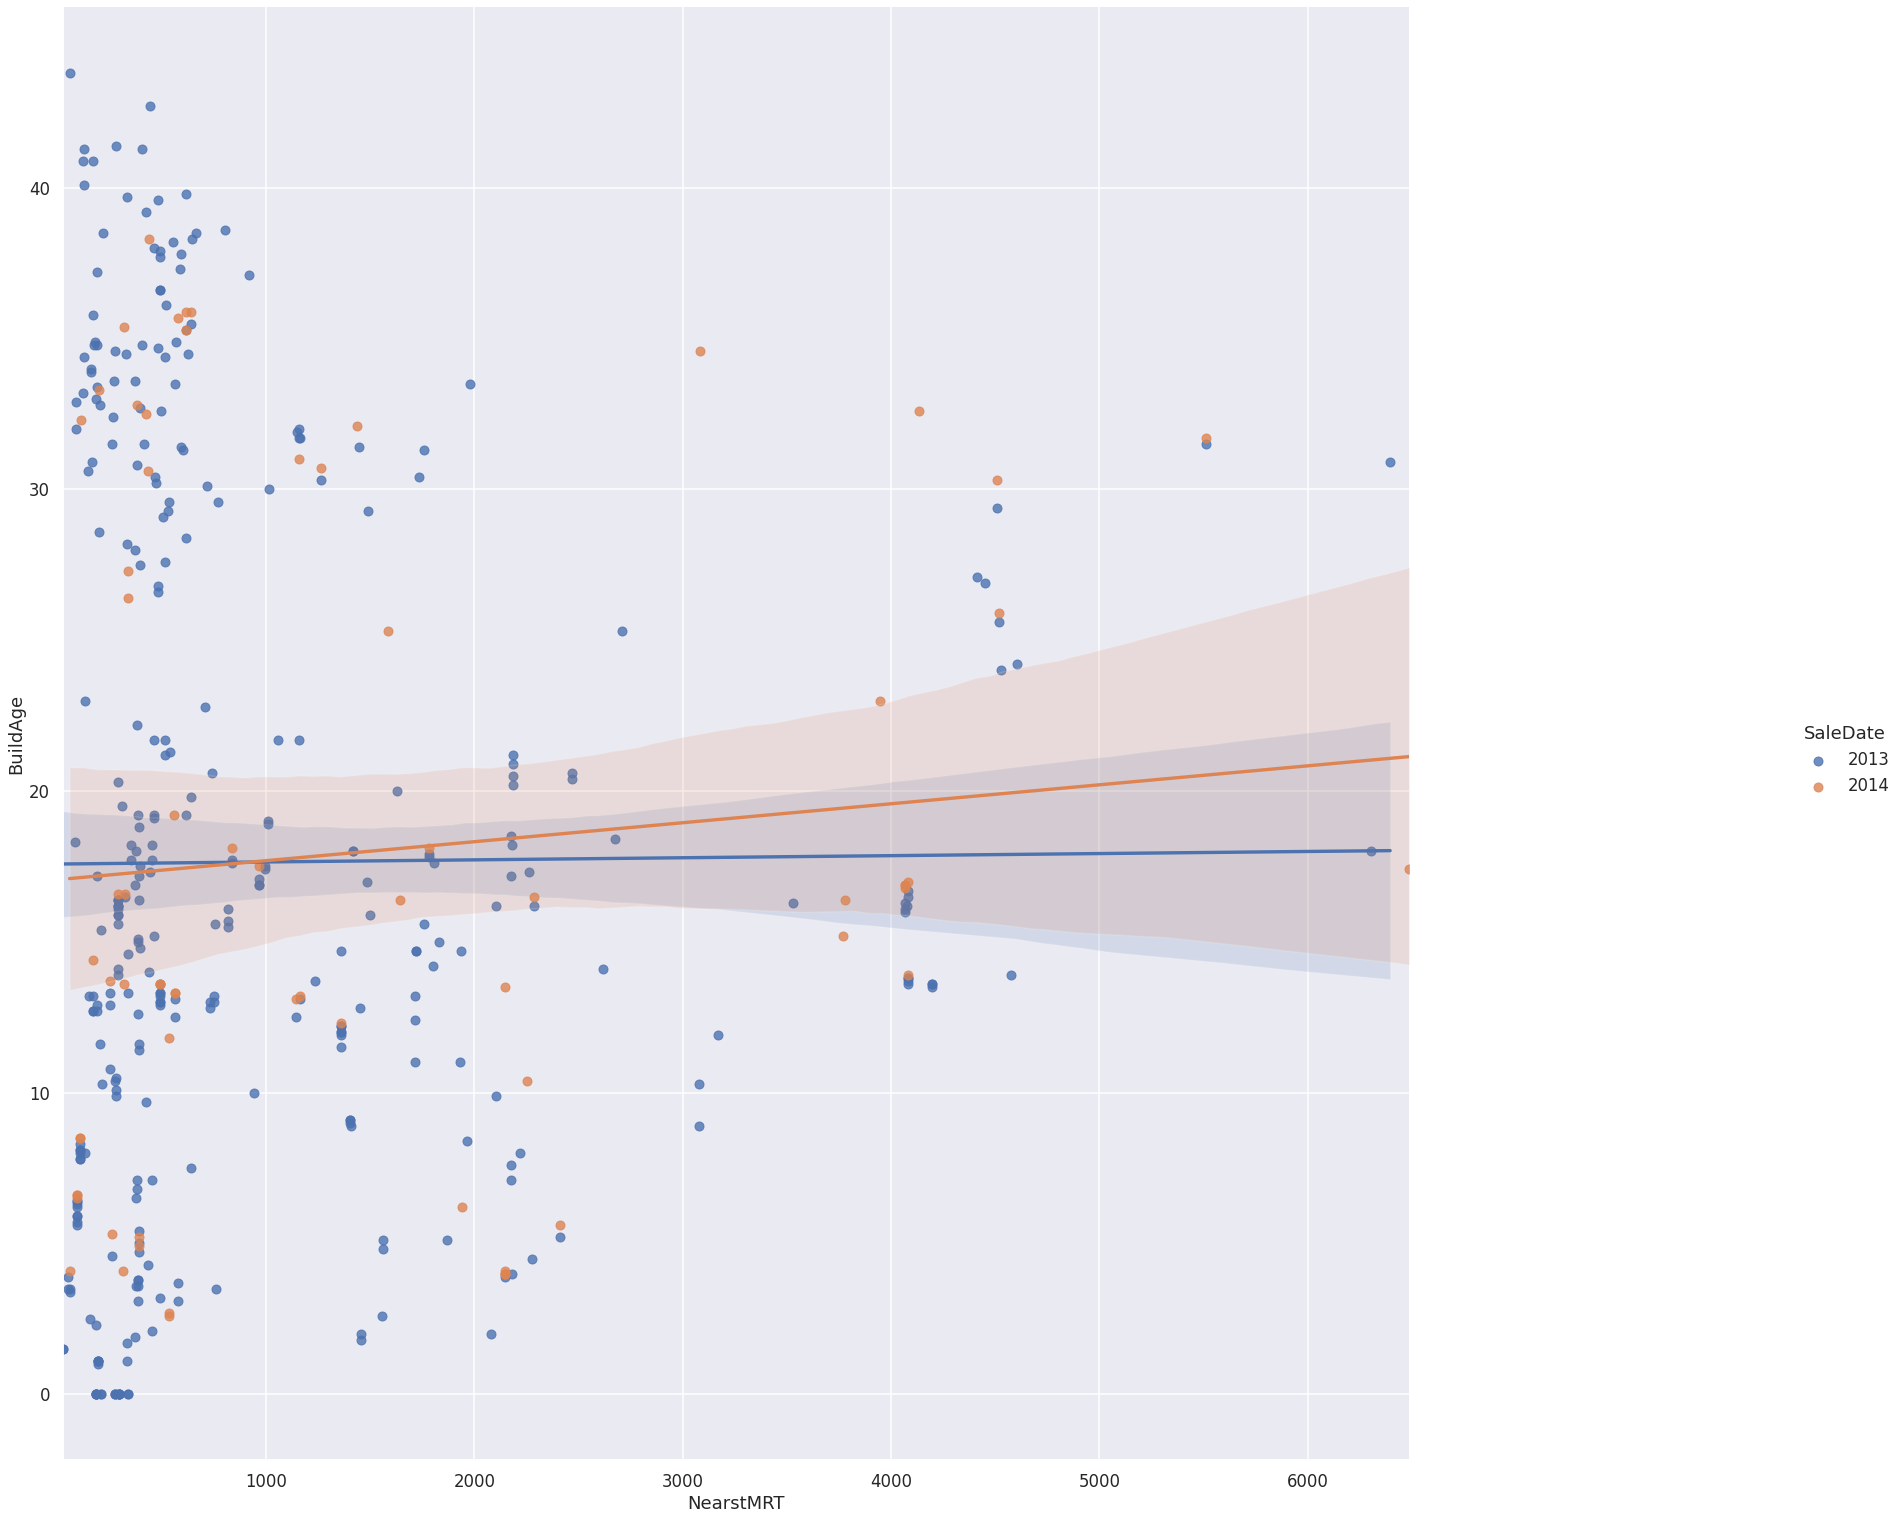

In [27]:
#sns.set_palette("Paired",2,.75)
g = sns.set_theme(color_codes=True)
sns.set_context("talk", font_scale = 1)
g=sns.lmplot(x='NearstMRT', y='BuildAge', data=df, hue = 'SaleDate');
g.fig.set_size_inches(30,25)


#**Price Vs Building Age.**

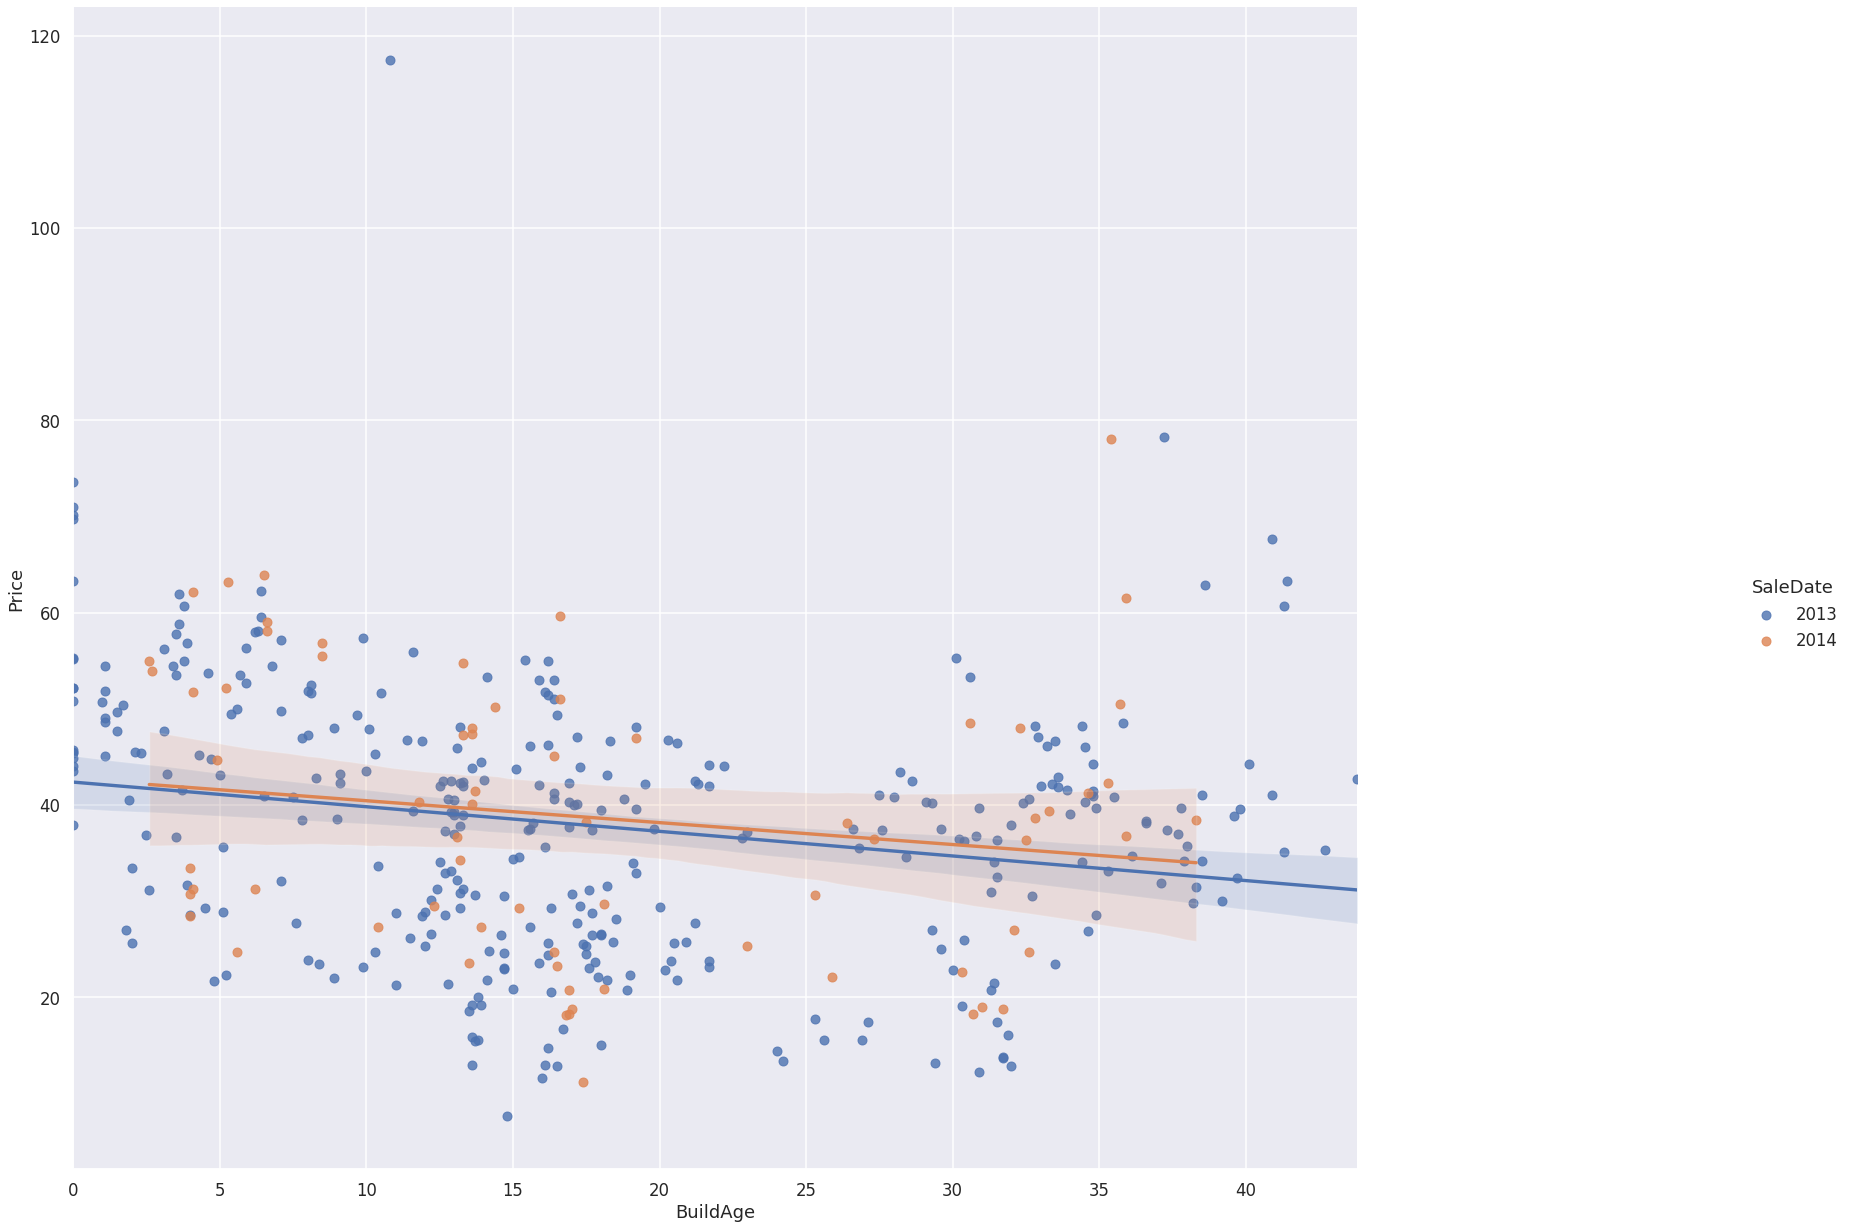

In [28]:
# Price Vs Building Age.

sns.set_theme(color_codes=True)
sns.set_context("talk", font_scale = 1)
g = sns.lmplot(x='BuildAge', y='Price', data = df, hue = 'SaleDate')
g.fig.set_size_inches(30,20);



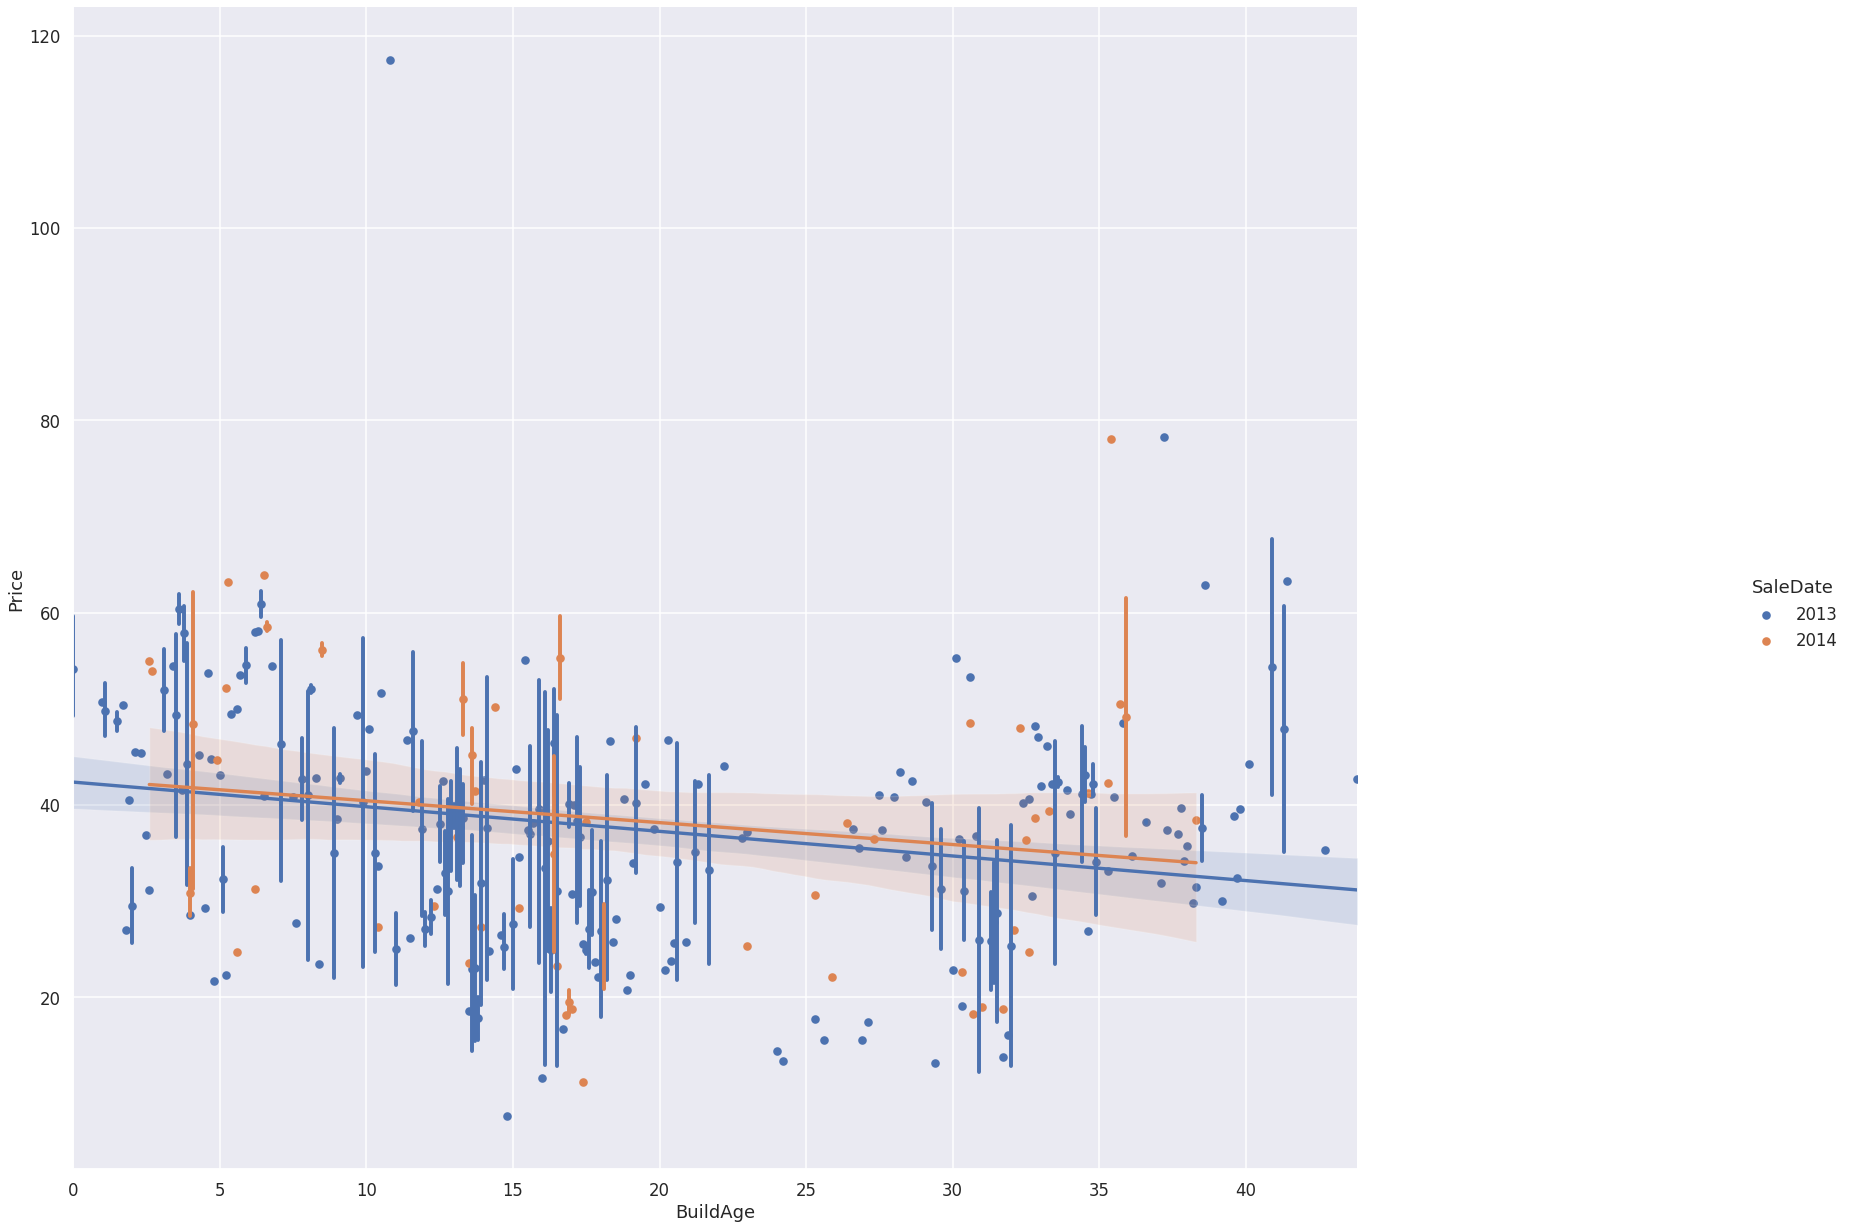

In [29]:
#g = sns.set_theme(color_codes = True)
sns.set(style="darkgrid")
sns.set_context("talk", font_scale = 1)
g = sns.lmplot(x = 'BuildAge', y = 'Price', data = df, x_estimator=np.mean, hue = 'SaleDate');
g.fig.set_size_inches(30,20);

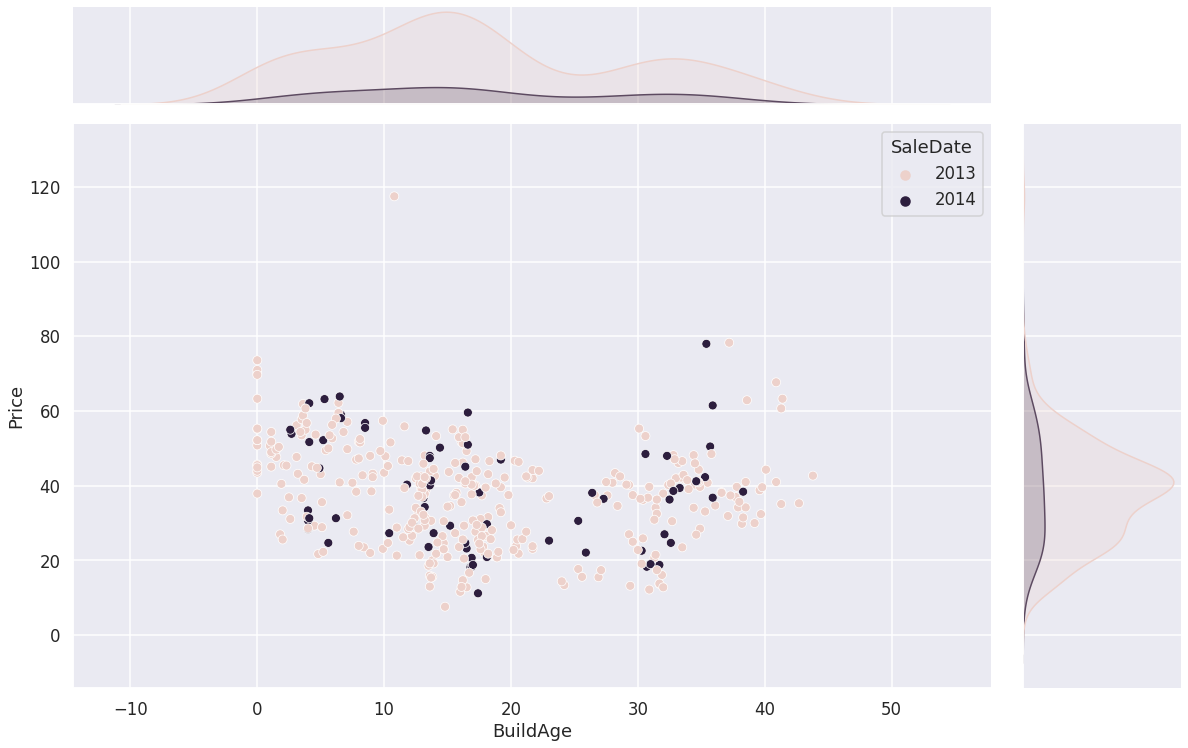

In [30]:

sns.set(style="darkgrid")
sns.set_context("talk", font_scale = 1)
g = sns.jointplot(x = 'BuildAge', y = 'Price', data = df, hue = 'SaleDate');
g.fig.set_size_inches(20,12);

#**Working on it, I'll be arround**